<h1>importing the libraries</h1>

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score,accuracy_score,confusion_matrix,classification_report
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

<h1>importing the datasets</h1>

In [14]:
data=pd.read_csv("../Data/cleaned_data.csv")

<h1>split the data to dependent & independent variables</h1>

In [15]:
x=data.iloc[:,:-1]
y=data.iloc[:,-1]

<h1>split the dataset to train & test data</h1>

In [16]:
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.33,random_state=42,stratify=y)

<h1>Standardization</h1>

In [17]:
scaler=StandardScaler()
scaler.fit_transform(x_train)
scaler.transform(x_test)

array([[-1.07116122e-01, -1.11985588e+00, -8.89996770e-02, ...,
        -1.23841647e-01, -3.93154778e-01,  1.10521838e-03],
       [-1.07116122e-01, -1.11985588e+00, -8.89996770e-02, ...,
        -1.23841647e-01, -3.93154778e-01,  1.10521838e-03],
       [ 9.72562803e-03,  1.42268409e+00, -8.89996770e-02, ...,
        -1.23841647e-01, -3.93154778e-01,  1.10521838e-03],
       ...,
       [-1.06737706e-01, -3.25312139e-01, -8.89996770e-02, ...,
        -1.23815811e-01,  2.94336111e-01,  1.10521838e-03],
       [ 2.02966286e-01, -3.25312139e-01, -8.89996770e-02, ...,
         5.26923857e+00,  3.47398147e+00,  1.10521838e-03],
       [-3.22032816e-02,  1.42268409e+00, -8.89996770e-02, ...,
        -1.23841647e-01, -3.93154778e-01,  1.10521838e-03]],
      shape=(2363075, 45))

<h1>training the model SVM</h1>

In [18]:
classifier = LinearSVC(dual=False, random_state=42, max_iter=10000)
classifier.fit(x_train,y_train)

,"penalty penalty: {'l1', 'l2'}, default='l2'Specifies the norm used in the penalization. The 'l2'penalty is the standard used in SVC. The 'l1' leads to ``coef_``vectors that are sparse.",'l2'
,"loss loss: {'hinge', 'squared_hinge'}, default='squared_hinge'Specifies the loss function. 'hinge' is the standard SVM loss(used e.g. by the SVC class) while 'squared_hinge' is thesquare of the hinge loss. The combination of ``penalty='l1'``and ``loss='hinge'`` is not supported.",'squared_hinge'
,"dual dual: ""auto"" or bool, default=""auto""Select the algorithm to either solve the dual or primaloptimization problem. Prefer dual=False when n_samples > n_features.`dual=""auto""` will choose the value of the parameter automatically,based on the values of `n_samples`, `n_features`, `loss`, `multi_class`and `penalty`. If `n_samples` < `n_features` and optimizer supportschosen `loss`, `multi_class` and `penalty`, then dual will be set to True,otherwise it will be set to False... versionchanged:: 1.3 The `""auto""` option is added in version 1.3 and will be the default in version 1.5.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"C C: float, default=1.0Regularization parameter. The strength of the regularization isinversely proportional to C. Must be strictly positive.For an intuitive visualization of the effects of scalingthe regularization parameter C, see:ref:`sphx_glr_auto_examples_svm_plot_svm_scale_c.py`.",1.0
,"multi_class multi_class: {'ovr', 'crammer_singer'}, default='ovr'Determines the multi-class strategy if `y` contains more thantwo classes.``""ovr""`` trains n_classes one-vs-rest classifiers, while``""crammer_singer""`` optimizes a joint objective over all classes.While `crammer_singer` is interesting from a theoretical perspectiveas it is consistent, it is seldom used in practice as it rarely leadsto better accuracy and is more expensive to compute.If ``""crammer_singer""`` is chosen, the options loss, penalty and dualwill be ignored.",'ovr'
,"fit_intercept fit_intercept: bool, default=TrueWhether or not to fit an intercept. If set to True, the feature vectoris extended to include an intercept term: `[x_1, ..., x_n, 1]`, where1 corresponds to the intercept. If set to False, no intercept will beused in calculations (i.e. data is expected to be already centered).",True
,"intercept_scaling intercept_scaling: float, default=1.0When `fit_intercept` is True, the instance vector x becomes ``[x_1,..., x_n, intercept_scaling]``, i.e. a ""synthetic"" feature with aconstant value equal to `intercept_scaling` is appended to the instancevector. The intercept becomes intercept_scaling * synthetic featureweight. Note that liblinear internally penalizes the intercept,treating it like any other term in the feature vector. To reduce theimpact of the regularization on the intercept, the `intercept_scaling`parameter can be set to a value greater than 1; the higher the value of`intercept_scaling`, the lower the impact of regularization on it.Then, the weights become `[w_x_1, ..., w_x_n,w_intercept*intercept_scaling]`, where `w_x_1, ..., w_x_n` representthe feature weights and the intercept weight is scaled by`intercept_scaling`. This scaling allows the intercept term to have adifferent regularization behavior compared to the other features.",1
,"class_weight class_weight: dict or 'balanced', default=NoneSet the parameter C of class i to ``class_weight[i]*C`` forSVC. If not given, all classes are supposed to haveweight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.",None
,"verbose verbose: int, default=0Enable verbose output. Note that this setting takes advantage of aper-process runtime setting in liblinear that, if enabled, may not workproperly in a multithreaded context.",0
,"random_state random_state: int, RandomState instance or None, default=NoneControls the pseudo rando

<h3>prdeict the test data</h3>

In [19]:
y_pred=classifier.predict(x_test)

<h2>the metrics </h2>

<h4>the accuracy </h4>

In [20]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Print the "Big Three" (Precision, Recall, F1)
print(classification_report(y_test, y_pred))

# Get the AUC Score (requires probability or decision function)
# For LinearSVC, use decision_function
y_score = classifier.decision_function(x_test)
print(f"ROC-AUC Score: {roc_auc_score(y_test, y_score)}")

              precision    recall  f1-score   support

           0       0.64      0.50      0.56     63602
           1       0.99      0.99      0.99   2299473

    accuracy                           0.98   2363075
   macro avg       0.81      0.75      0.78   2363075
weighted avg       0.98      0.98      0.98   2363075

ROC-AUC Score: 0.5338873998662615


In [21]:
acc=accuracy_score(y_pred,y_test)
print("the accuracy is:",acc)

the accuracy is: 0.9788978343895136


<h4>the confusion matrix</h4>

In [22]:
cm=confusion_matrix(y_pred,y_test)
print(cm)

[[  31964   18228]
 [  31638 2281245]]


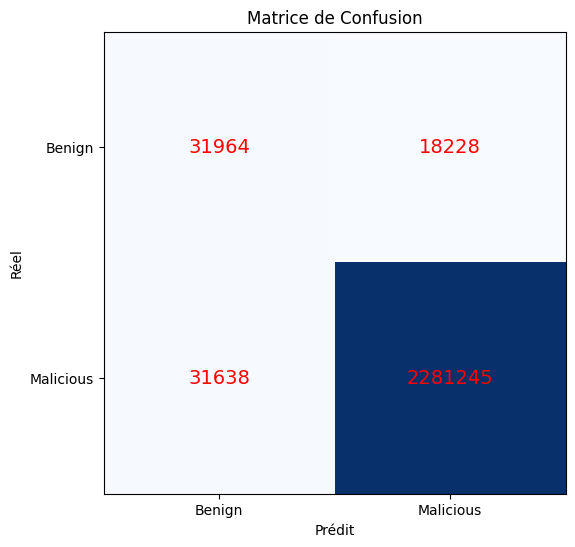

In [23]:
fig, ax = plt.subplots(figsize=(6,6))
im = ax.imshow(cm, cmap=plt.cm.Blues)  # couleur

# Ajouter les valeurs à l’intérieur des cases
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, cm[i, j], ha="center", va="center", color="red", fontsize=14)

# Titres et labels
ax.set_xlabel("Prédit")
ax.set_ylabel("Réel")
ax.set_title("Matrice de Confusion")
ax.set_xticks([0,1])
ax.set_yticks([0,1])
ax.set_xticklabels(["Benign", "Malicious"])
ax.set_yticklabels(["Benign", "Malicious"])

plt.show()


On a trouvé que l accuracy de notre model est presque 0.999 ce qui est inquiètant : c'est l accuracy paradox du au diséquilibre de nos données !

<h2>balancing the data</h2>

In [ ]:
model2 =SVC(kernel="rbf",random_state=0)
model2.fit(x_train, y_train)

In [ ]:
y_pred2=model2.predict(x_test)


In [ ]:
acc2=accuracy_score(y_pred2,y_test)
print("the accuracy is :",acc2)

the accuracy is : 0.9988210276863833


In [ ]:
cm2=confusion_matrix(y_pred2,y_test)
print(cm2)

[[  60922     372]
 [   2414 2299367]]


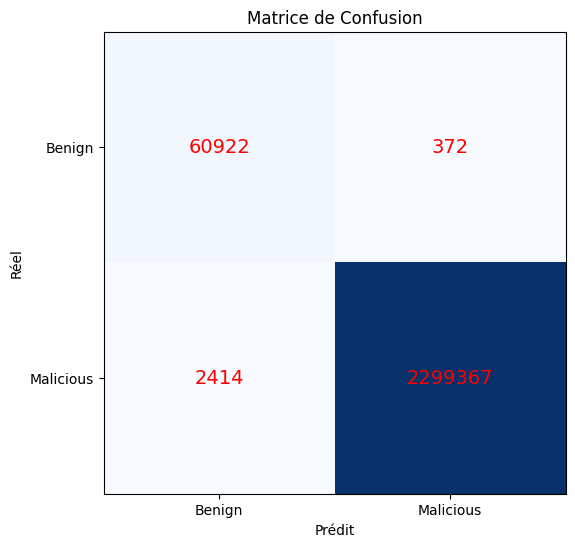

In [ ]:
fig, ax = plt.subplots(figsize=(6,6))
im = ax.imshow(cm2, cmap=plt.cm.Blues)  # couleur

# Ajouter les valeurs à l’intérieur des cases
for i in range(cm2.shape[0]):
    for j in range(cm2.shape[1]):
        ax.text(j, i, cm2[i, j], ha="center", va="center", color="red", fontsize=14)

# Titres et labels
ax.set_xlabel("Prédit")
ax.set_ylabel("Réel")
ax.set_title("Matrice de Confusion")
ax.set_xticks([0,1])
ax.set_yticks([0,1])
ax.set_xticklabels(["Benign", "Malicious"])
ax.set_yticklabels(["Benign", "Malicious"])

plt.show()


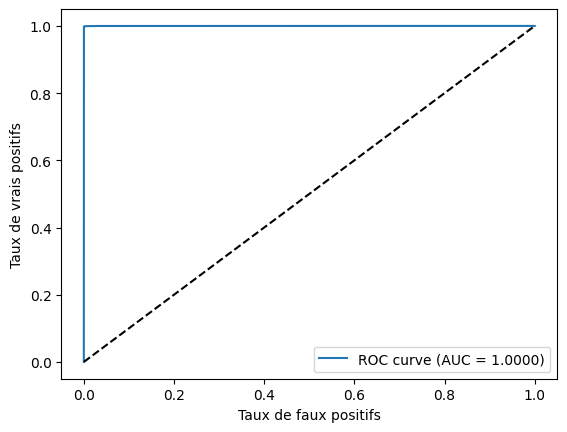

In [ ]:
from sklearn.metrics import roc_curve, auc

y_probs = model2.predict_proba(x_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], 'k--') # Ligne de hasard
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, y_pred, digits=4))

              precision    recall  f1-score   support

           0     0.9814    0.9943    0.9878     63336
           1     0.9998    0.9995    0.9997   2299739

    accuracy                         0.9993   2363075
   macro avg     0.9906    0.9969    0.9937   2363075
weighted avg     0.9993    0.9993    0.9993   2363075



<h3>conclusion<h3>

Avec l’utilisation du modèle <i>SVM</i>, le système de classification a atteint une accuracy de [99.8%], ce qui indique, à première vue, une performance globale élevée. Toutefois, étant donné le déséquilibre de la variable cible entre les classes benign et malicious, cette métrique à elle seule peut être trompeuse et conduire à ce que l’on appelle l’accuracy paradox. Afin de garantir une évaluation plus fiable du modèle, les métriques Recall et F1-score ont également été analysées. Ces indicateurs permettent de mesurer respectivement la capacité du modèle à détecter correctement les instances malicious et l’équilibre entre la précision et le rappel. Les valeurs obtenues pour le recall et le F1-score confirment que la performance du modèle ne repose pas uniquement sur la prédiction majoritaire de la classe dominante, mais qu’il parvient effectivement à identifier les comportements malveillants de manière pertinente.